# Adult Census Income Prediction

- Predict whether annual income of an individual exceeds $50K/yr based on census data

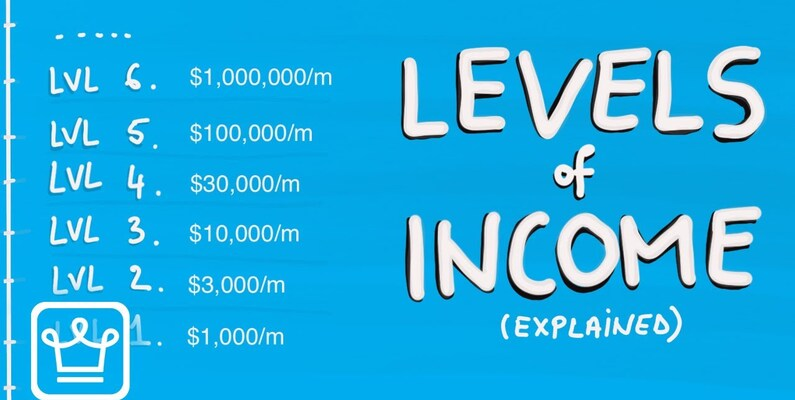

## About Dataset
- The Adult Census Income dataset is a rich resource for understanding the socio-economic factors that influence income levels. It contains demographic and employment information from the U.S. Census Bureau, including age, work class, education level, marital status, occupation, relationship, race, gender, hours per week worked, and native country. 

- The dataset also includes an ‘income’ column, indicating whether the individual’s income exceeds 50K per year. 

This dataset will be used for classification tasks in machine learning, where the goal is to predict whether an individual’s income exceeds 50K based on the other attributes.

Link to the Dataset: https://www.kaggle.com/datasets/lovishbansal123/adult-census-income

## Step 1: Loading the Dependencies

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

c:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data Loading & Understanding

In [2]:
adult_data = pd.read_csv('adult.csv') 
adult_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# shape of the data
print(adult_data.shape)
print(f'The dataset consists of {adult_data.shape[0]} rows and {adult_data.shape[1]} columns.')

(32561, 15)
The dataset consists of 32561 rows and 15 columns.


In [7]:
numerical_columns = adult_data.select_dtypes(include=[np.number]).columns
categorical_columns = adult_data.select_dtypes(exclude=[np.number]).columns
display(numerical_columns, categorical_columns)

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

#### - Unique Values

In [21]:
for i in numerical_columns:
    print(f'{i} : {adult_data[i].nunique()} unique values')
print('---' * 30)
for i in categorical_columns:
    print(f'{i} : {adult_data[i].nunique()} unique values')

age : 73 unique values
fnlwgt : 21648 unique values
education.num : 16 unique values
capital.gain : 119 unique values
capital.loss : 92 unique values
hours.per.week : 94 unique values
------------------------------------------------------------------------------------------
workclass : 9 unique values
education : 16 unique values
marital.status : 7 unique values
occupation : 15 unique values
relationship : 6 unique values
race : 5 unique values
sex : 2 unique values
native.country : 42 unique values
income : 2 unique values


#### - Statistical summary of the data

In [25]:
display(adult_data.select_dtypes(exclude='object').describe().T)
print('---' * 30)
display(adult_data.describe(include='object').T)

display(adult_data.select_dtypes(exclude='object').info())
print('---' * 30)
display(adult_data.select_dtypes(include='object').info())

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


------------------------------------------------------------------------------------------


,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,32561,42,United-States,29170
income,32561,2,<=50K,24720


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education.num   32561 non-null  int64
 3   capital.gain    32561 non-null  int64
 4   capital.loss    32561 non-null  int64
 5   hours.per.week  32561 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


None

------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital.status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   native.country  32561 non-null  object
 8   income          32561 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


None

## Step 2: Exploratory Data Analysis (EDA)

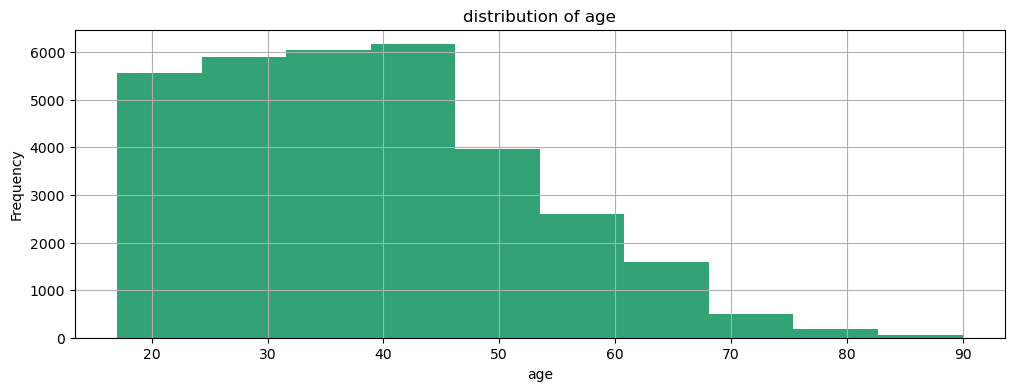

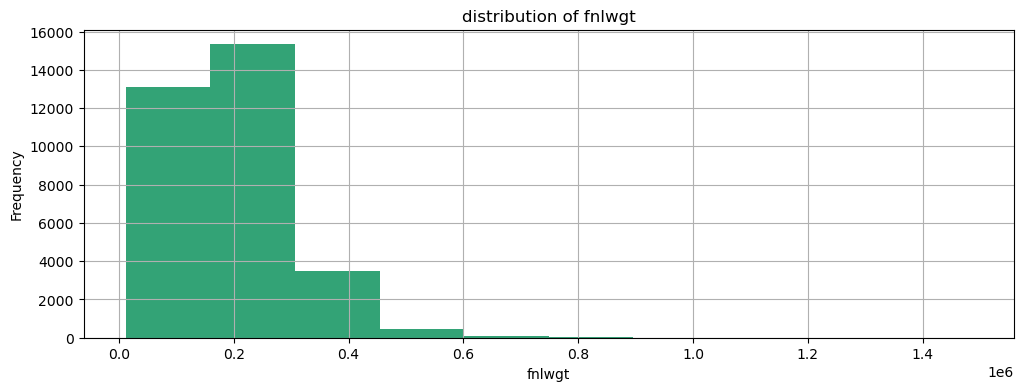

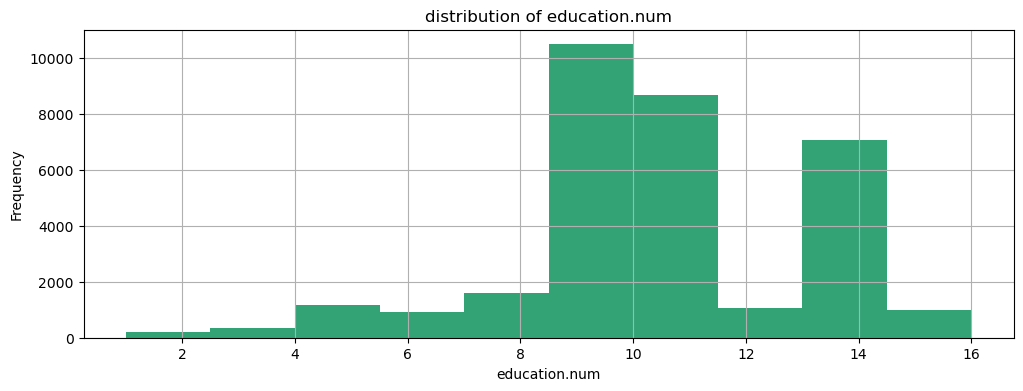

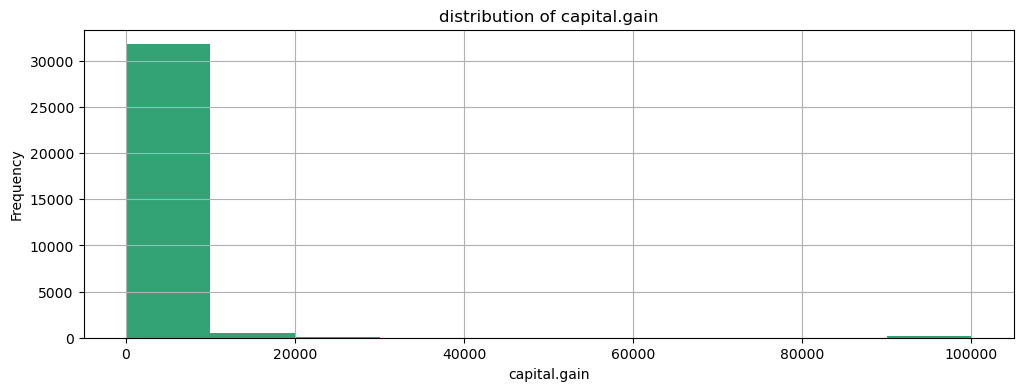

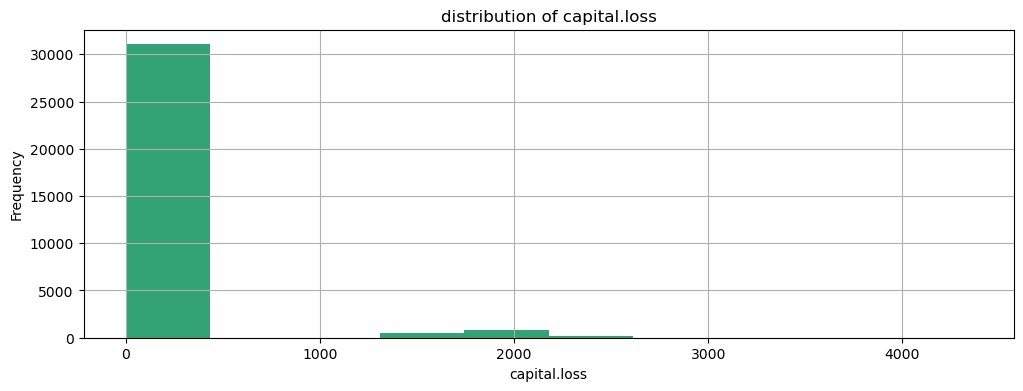

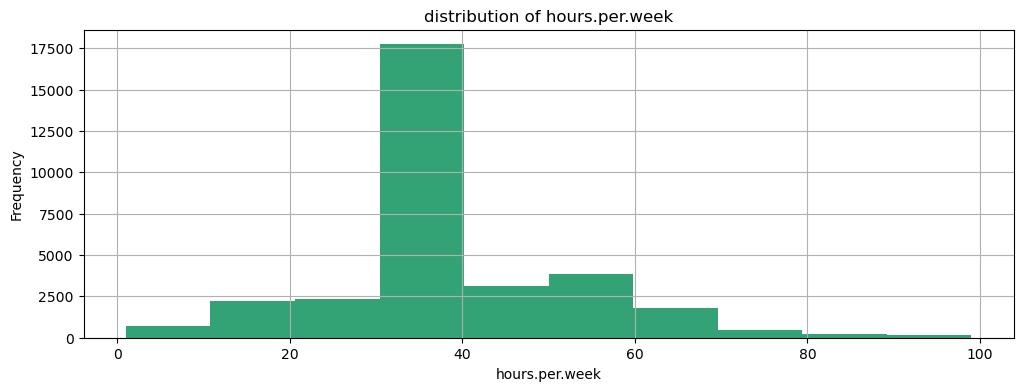

In [30]:
for i in adult_data.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(12,4))
    plt.hist(adult_data[i], color='#33A376')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'distribution of {i}')
    plt.grid()

#### - Correlation

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<AxesSubplot:>

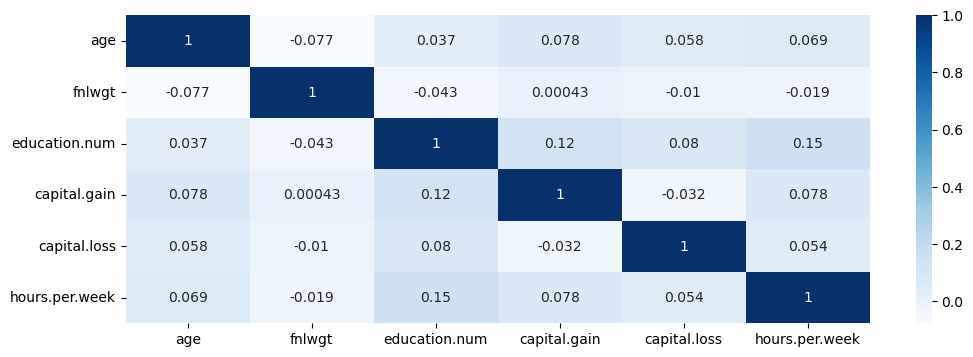

In [104]:
correlation = adult_data.select_dtypes(exclude='object').corr()
display(correlation)

# visulizing the correlation
plt.figure(figsize=(12,4))
sns.heatmap(correlation, annot=True, cmap='Blues')

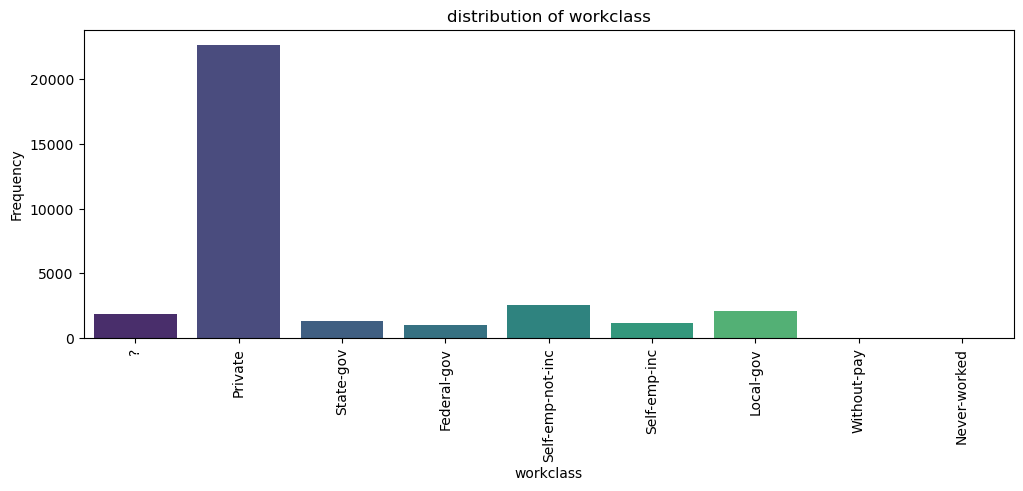

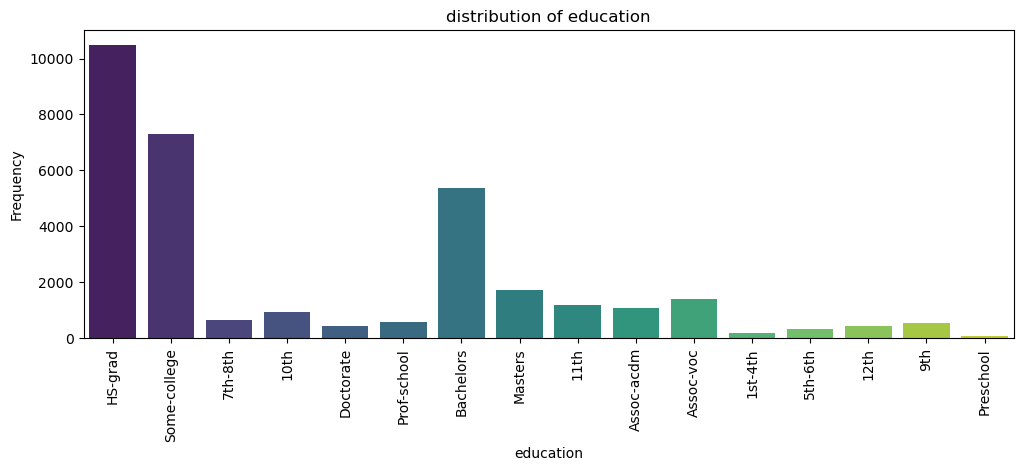

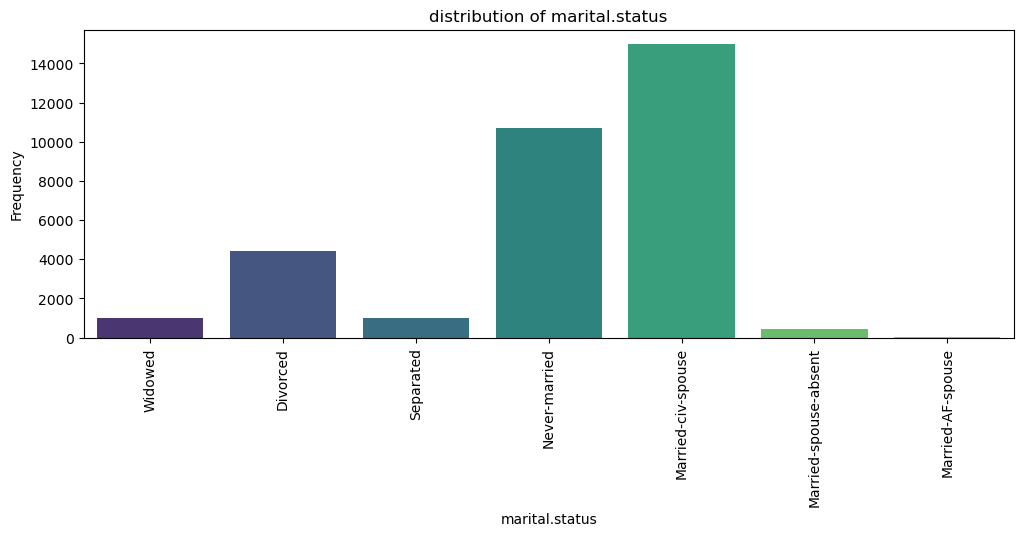

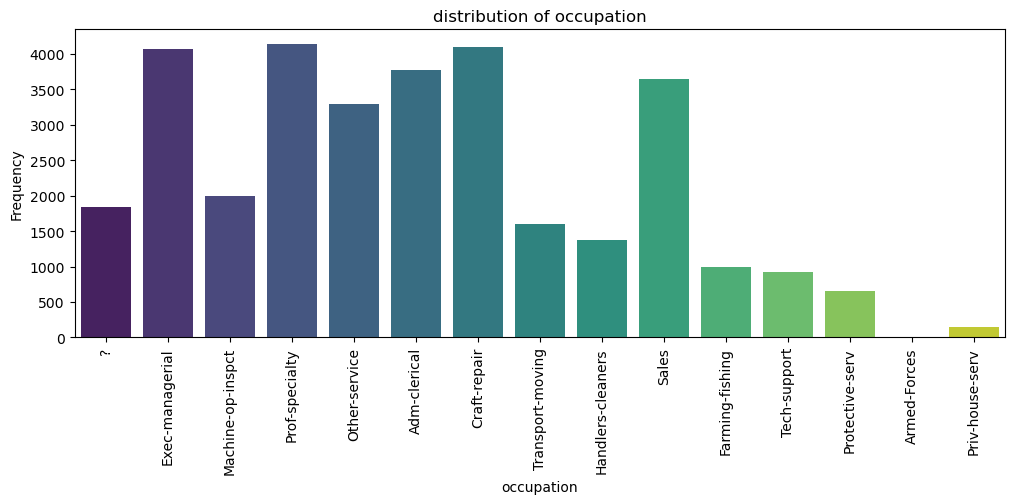

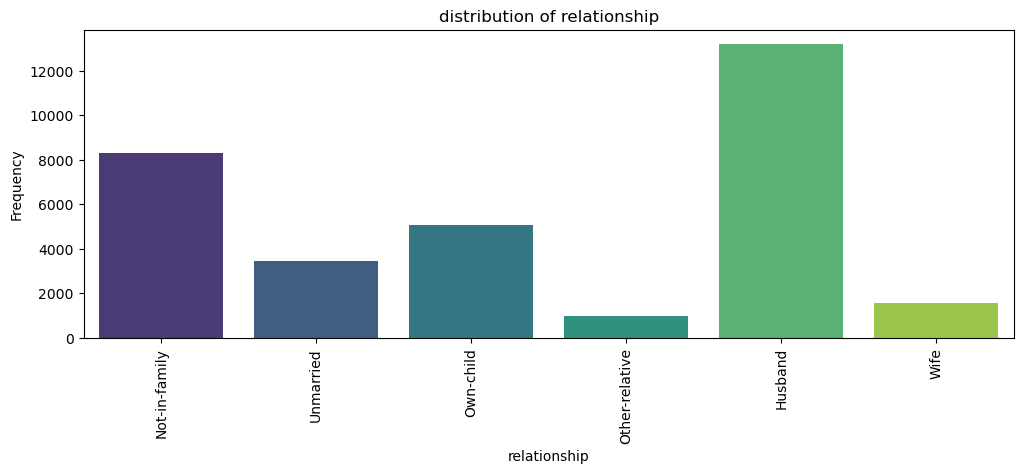

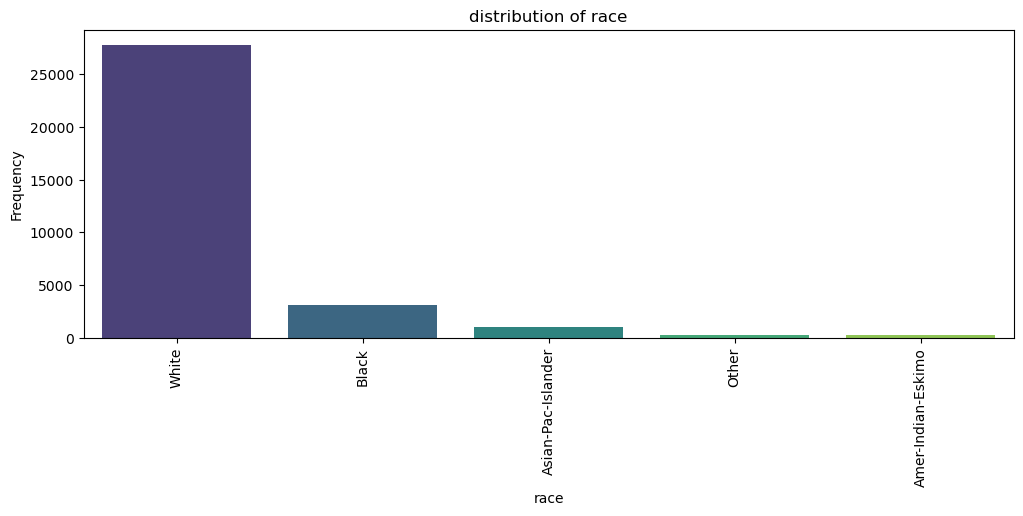

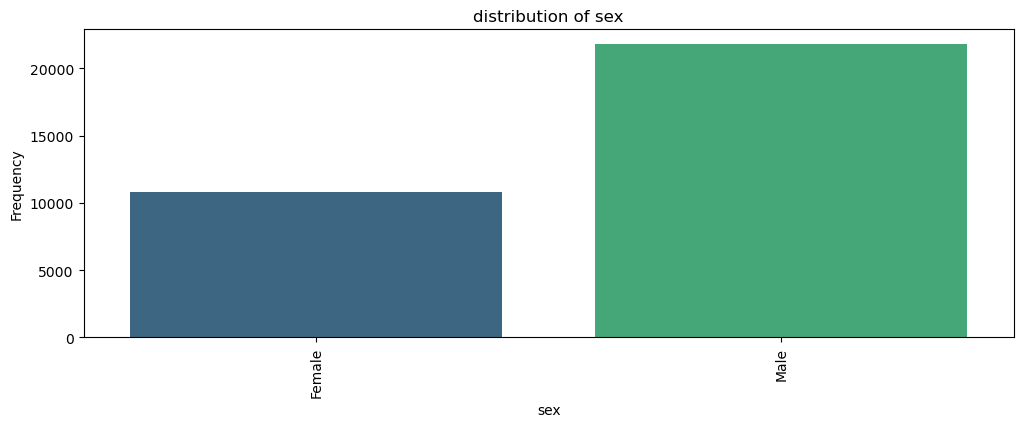

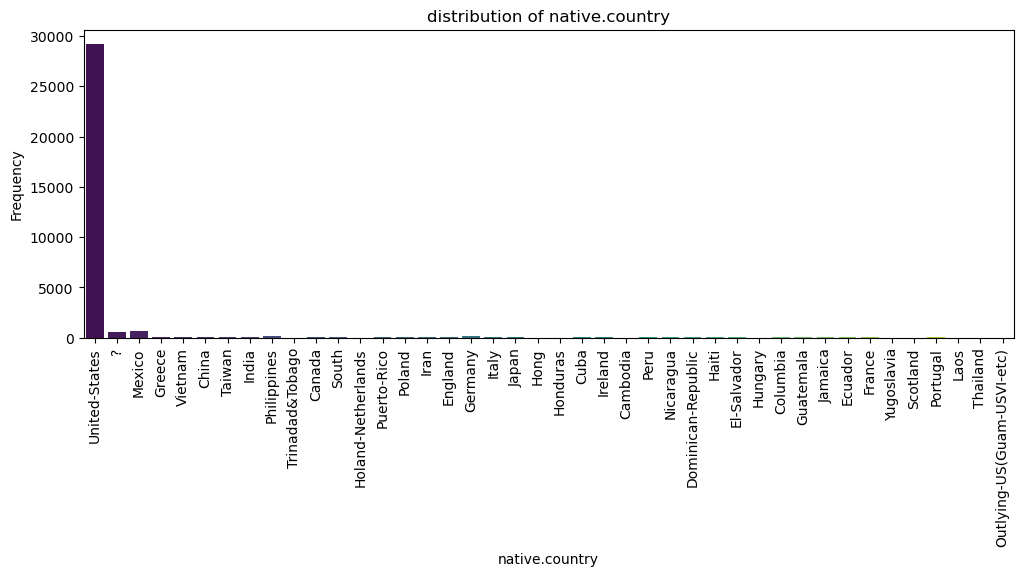

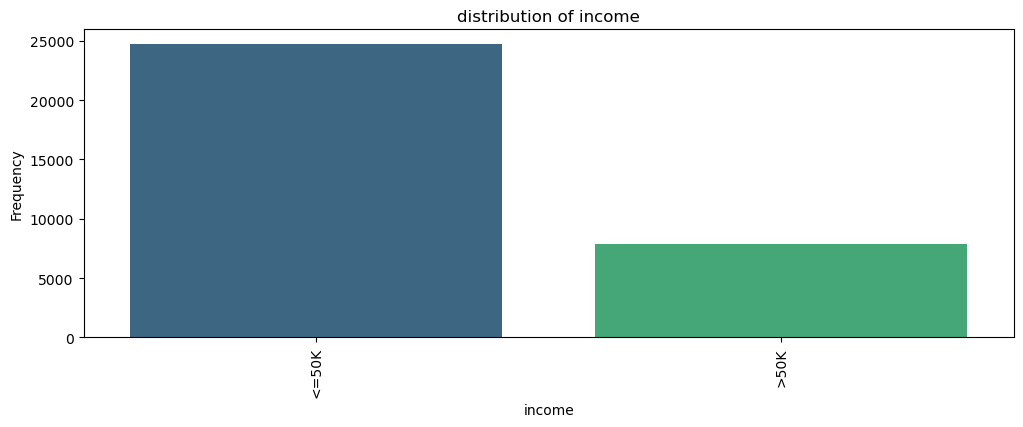

In [49]:
for i in adult_data.select_dtypes(include='object').columns:
    plt.figure(figsize=(12,4))
    sns.countplot(adult_data[i], palette='viridis')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.xticks(rotation='vertical')
    plt.title(f'distribution of {i}')
    

In [50]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

#### - Exporing the features by Income

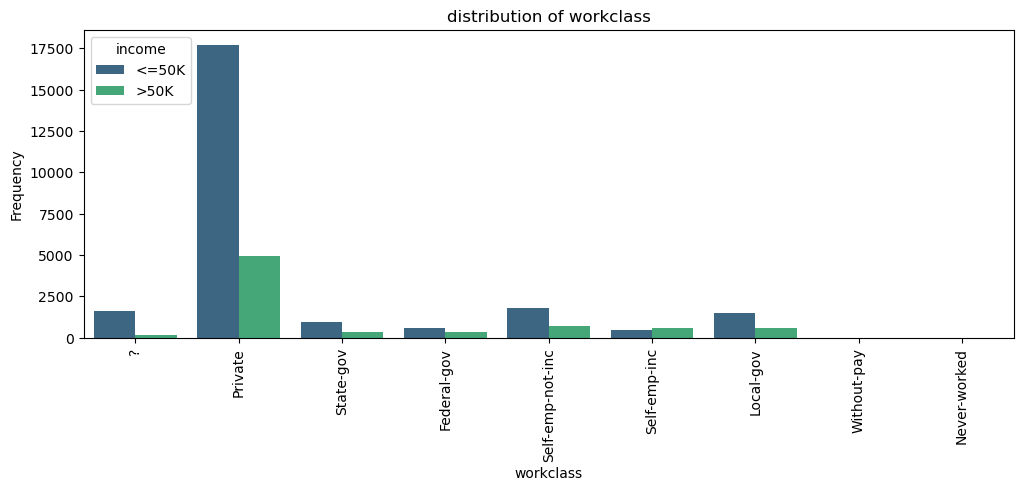

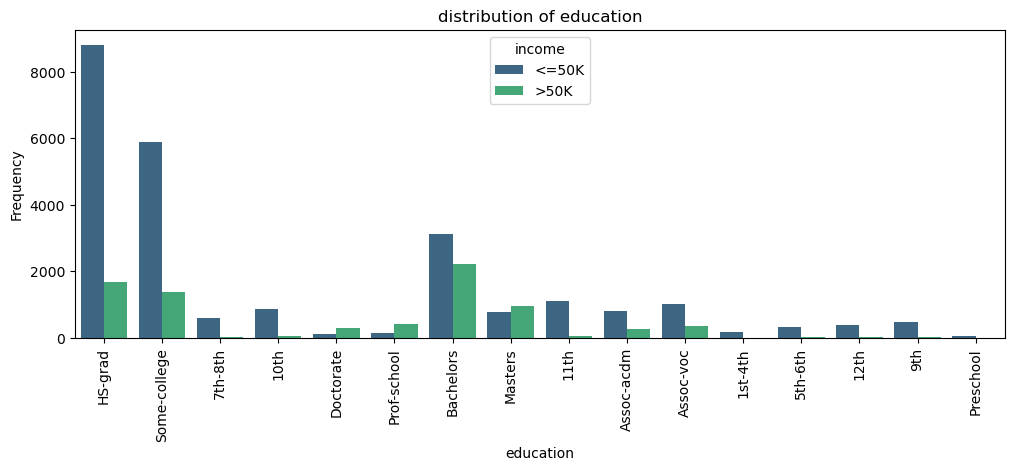

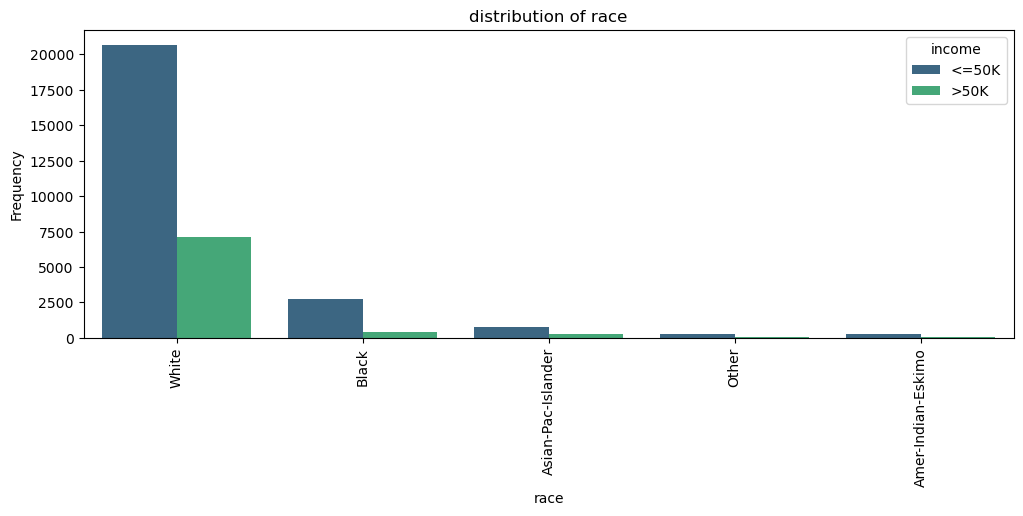

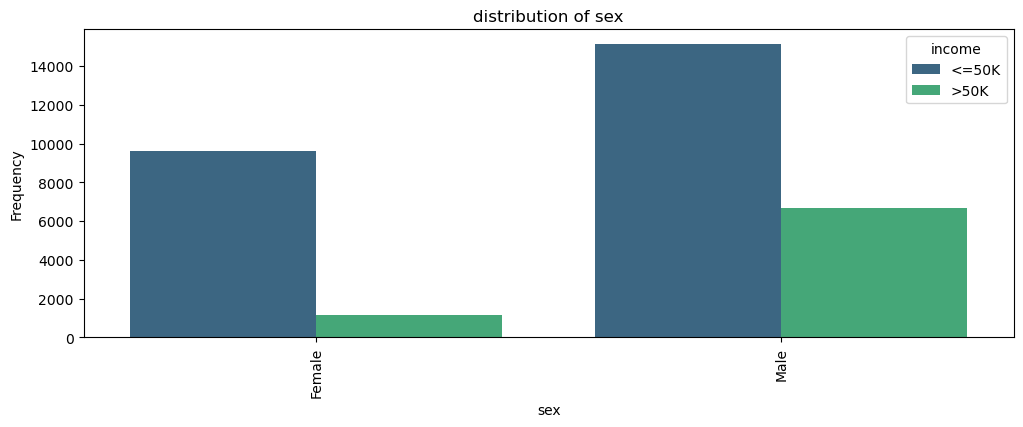

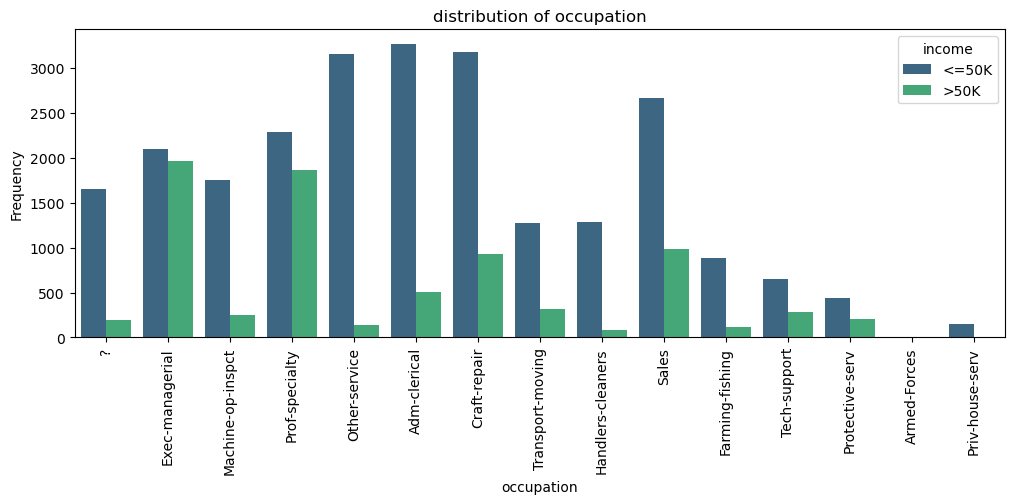

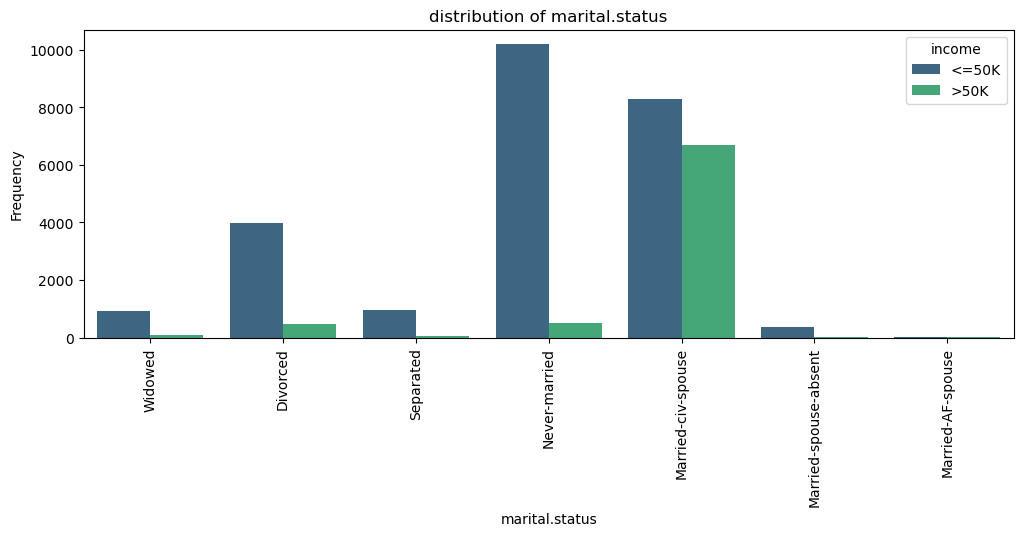

In [59]:
for i in adult_data[['workclass', 'education', 'race', 'sex', 'occupation', 'marital.status']].columns:
    plt.figure(figsize=(12,4))
    sns.countplot(adult_data[i], hue = adult_data['income'], palette='viridis')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.xticks(rotation='vertical')
    plt.title(f'distribution of {i}')

## Step 3: Data Preprocessing
- Selecting features for machine learning model
- Label Encoding the predicted variable
- Converting the selected categorical columns to numerical columns by using onehotencoder (get_dummies)

In [60]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [61]:
adult_data.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


In [64]:
# Feature Extraction
selected_columns = ['age', 'education','marital.status', 'relationship', 'race', 'sex', 'income']

# Creating a model data
model_df = adult_data[selected_columns]
model_df.head()

,age,education,marital.status,relationship,race,sex,income
0,90,HS-grad,Widowed,Not-in-family,White,Female,<=50K
1,82,HS-grad,Widowed,Not-in-family,White,Female,<=50K
2,66,Some-college,Widowed,Unmarried,Black,Female,<=50K
3,54,7th-8th,Divorced,Unmarried,White,Female,<=50K
4,41,Some-college,Separated,Own-child,White,Female,<=50K


#### - OneHotEncoding
- I will be making use of the pandas get_dummies

In [65]:
model_df.columns

Index(['age', 'education', 'marital.status', 'relationship', 'race', 'sex',
       'income'],
      dtype='object')

In [69]:
labeled_columns =  ['education', 'marital.status', 'relationship', 'race', 'sex']

final_df = pd.get_dummies(model_df, prefix=labeled_columns, columns=labeled_columns, dtype='int')
final_df

,age,income,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,90,<=50K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,82,<=50K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,66,<=50K,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,54,<=50K,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
4,41,<=50K,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,<=50K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32557,27,<=50K,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
32558,40,>50K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32559,58,<=50K,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


#### - Label Encoding

In [70]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
final_df['income'] = encode.fit_transform(final_df['income'])
final_df.head()

,age,income,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,66,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,54,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
4,41,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


#### - Splitting the data into training and testing set

In [79]:
X = final_df.drop('income', axis=1)
y = final_df['income']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26048, 37)

(6513, 37)

(26048,)

(6513,)

## Step 4: Building the Model
- #### Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(min_samples_leaf=3000, random_state=42)
dtree


DecisionTreeClassifier(min_samples_leaf=3000, random_state=42)

#### - Fitting the model

In [82]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=3000, random_state=42)

#### - Visualizing the model

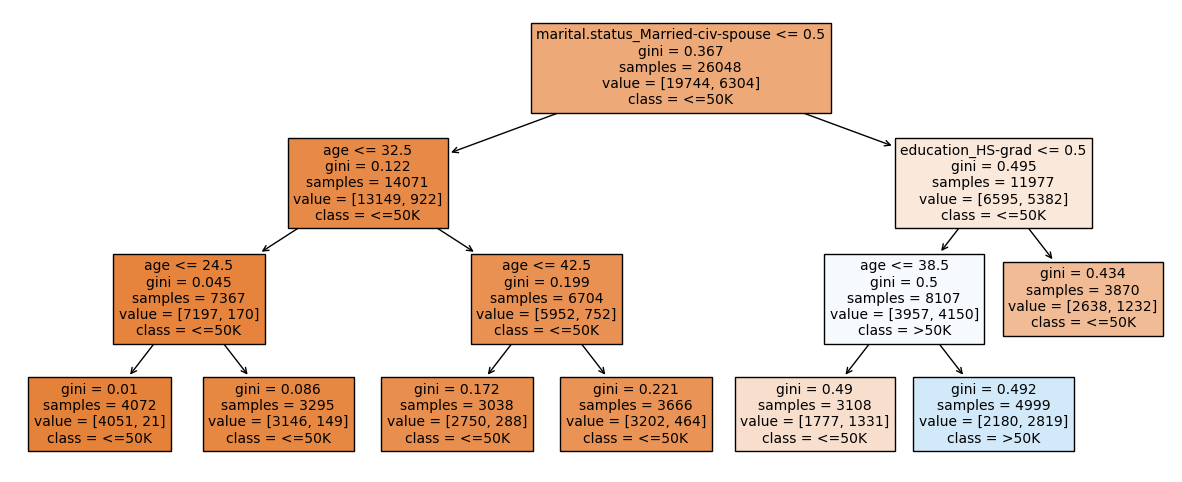

In [90]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,6))
dtree_plot = plot_tree(dtree, 
        feature_names=X_train.columns, 
        class_names=encode.classes_, fontsize=10, filled=True)

#### - Testing the Model and Accurarcy

In [94]:
dtree_predicted_value = dtree.predict(X_test)
dtree_predicted_value

array([0, 0, 0, ..., 1, 0, 1])

In [102]:
from sklearn.metrics import classification_report
classification = classification_report(y_test, dtree_predicted_value)
print(classification)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4976
           1       0.56      0.46      0.50      1537

    accuracy                           0.79      6513
   macro avg       0.70      0.67      0.68      6513
weighted avg       0.77      0.79      0.78      6513



Accurcy of the Model is: 0.787


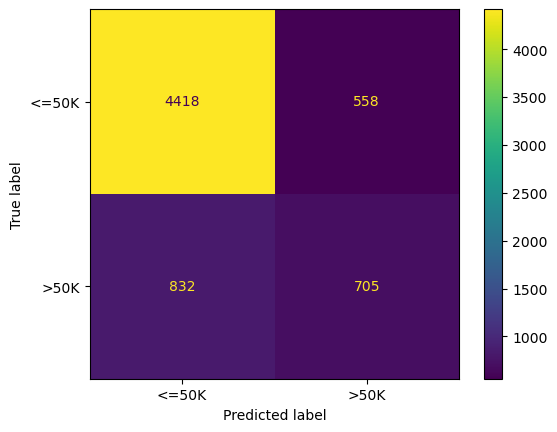

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

accuracy = accuracy_score(y_test, dtree_predicted_value)
print(f'Accurcy of the Model is: {accuracy:.3f}')

cm = confusion_matrix(y_test, dtree_predicted_value)
cmd = ConfusionMatrixDisplay(cm, display_labels=encode.classes_)
cmd.plot()